In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import DataSet

In [2]:
info = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

info.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


### Convert Gender in to number format

In [3]:
info['Gender'] = np.where((info.Gender == 'Male'), '0' , info['Gender'])

info['Gender'] = np.where((info.Gender == 'Female'), '1' , info['Gender'])

In [4]:
# in Gender Column Male = 0 and Female = 1

In [5]:
info.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [6]:
info['Gender'] = info['Gender'].astype(int)

In [7]:
info.dtypes

Gender    int32
Height    int64
Weight    int64
Index     int64
dtype: object

In [8]:
info.describe()

,Gender,Height,Weight,Index
count,500.000000,500.000000,500.000000,500.000000
mean,0.510000,169.944000,106.000000,3.748000
std,0.500401,16.375261,32.382607,1.355053
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,1.000000,170.500000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


### Check Missing Value

In [9]:
info.shape

(500, 4)

In [10]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  500 non-null    int32
 1   Height  500 non-null    int64
 2   Weight  500 non-null    int64
 3   Index   500 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 13.8 KB


In [11]:
info['Gender'].value_counts()

1    255
0    245
Name: Gender, dtype: int64

In [12]:
info['Index'].value_counts()

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

### View Regression in Fig.

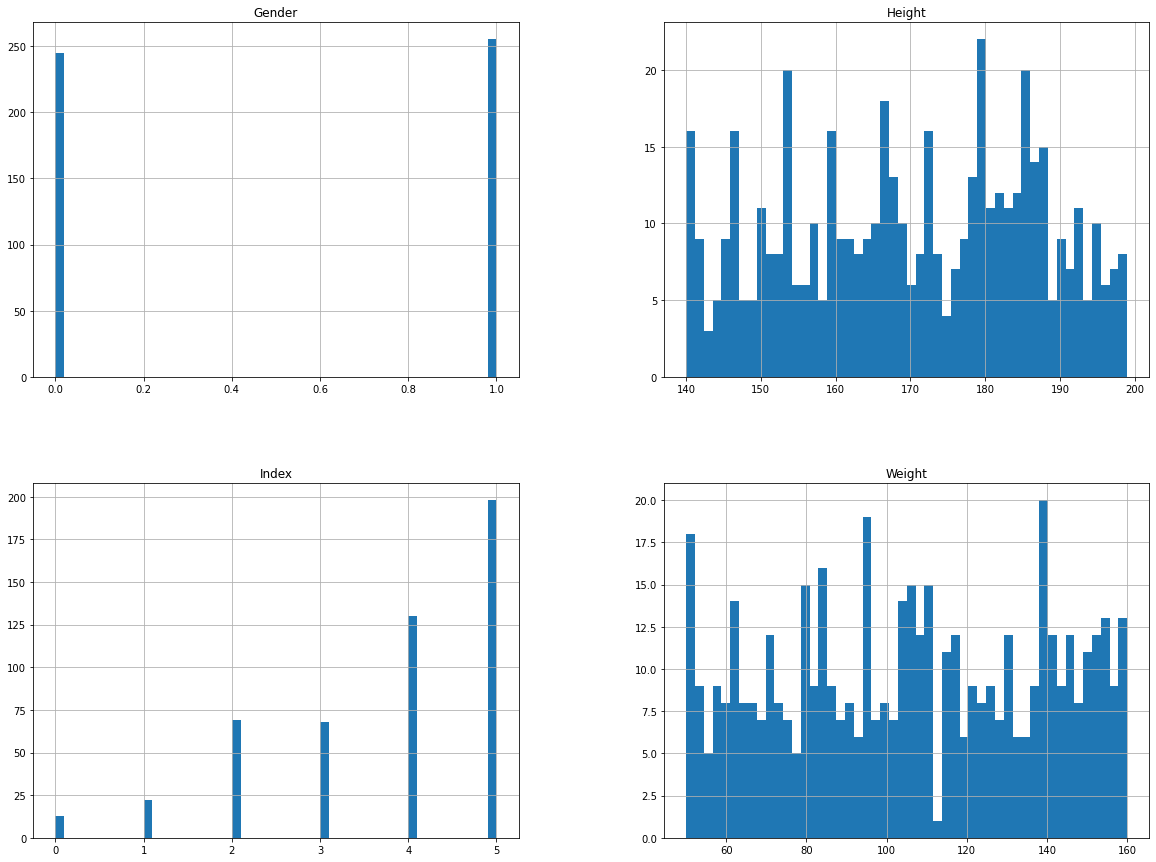

In [13]:
info.hist(bins = 50, figsize=(20,15))
plt.show()

### Divide Train and Test Dataset

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(info, test_size=0.2, random_state=42)

print(len(train_set))
print(len(test_set))

400
100


In [15]:
info = train_set.copy()

### Correlations

In [16]:
cor_data = info.corr()

cor_data['Index'].sort_values(ascending=False)

Index     1.000000
Weight    0.801521
Gender   -0.063925
Height   -0.407796
Name: Index, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B059C08>,
      dtype=object)

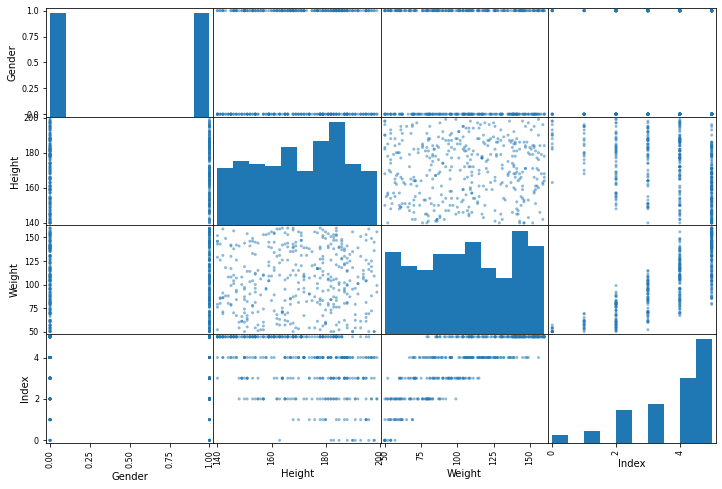

In [17]:
from pandas.plotting import scatter_matrix

scatter_matrix(info, figsize=(12,8))

### Change a Feature and Label

In [18]:
info = train_set.drop('Index', axis=1)
info_lable = train_set['Index'].copy()

### SK-Learn Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [20]:
info_num_tr = my_pipeline.fit_transform(info)

In [21]:
info_num_tr.shape

(400, 3)

### Select LinearRegression Model

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(info_num_tr, info_lable)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Check Model

In [23]:
some_data = info.iloc[:10]
some_label = info_lable.iloc[:10]

#for Checking purpose

In [24]:
prepared_data = my_pipeline.transform(some_data)

In [25]:
model.predict(prepared_data)

array([3.51717715, 4.18263825, 4.84815149, 4.32214343, 2.64870688,
       3.22582596, 3.41910347, 4.28619094, 3.57796768, 5.76914284])

In [26]:
list(some_label)

[4, 4, 5, 5, 2, 4, 4, 5, 4, 5]

#### Evaluating the Model

In [27]:
from sklearn.metrics import mean_squared_error

info_prediction = model.predict(info_num_tr)
mse = mean_squared_error(info_lable, info_prediction)
rmse = np.sqrt(mse)

In [28]:
rmse

0.5612697889807987

### Select DecisionTreeRegressor Model

In [29]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(info_num_tr, info_lable)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
prepared_data = my_pipeline.transform(some_data)

model.predict(prepared_data)

array([4., 4., 5., 5., 2., 4., 4., 5., 4., 5.])

In [31]:
list(some_label)

[4, 4, 5, 5, 2, 4, 4, 5, 4, 5]

In [32]:
from sklearn.metrics import mean_squared_error

info_prediction = model.predict(info_num_tr)
mse = mean_squared_error(info_lable, info_prediction)
rmse = np.sqrt(mse)
rmse

0.0

In [33]:
## Overfitting

##### Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, info_num_tr, info_lable, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.57008771, 0.67082039, 0.38729833, 0.52440442, 0.27386128,
       0.4472136 , 0.35355339, 0.41833001, 0.47434165, 0.52440442])

### Select SVM Model

In [35]:
from sklearn import svm

model = svm.SVR()
model.fit(info_num_tr, info_lable)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
prepared_data = my_pipeline.transform(some_data)

model.predict(prepared_data)

array([3.96530996, 4.57815659, 5.01187155, 4.92776822, 2.41386572,
       3.50899394, 3.75688585, 4.66376841, 4.09981317, 5.0417973 ])

In [37]:
list(some_label)

[4, 4, 5, 5, 2, 4, 4, 5, 4, 5]

In [38]:
from sklearn.metrics import mean_squared_error

info_prediction = model.predict(info_num_tr)
mse = mean_squared_error(info_lable, info_prediction)
rmse = np.sqrt(mse)
rmse

0.3316046079448517

### Select Bayesian Ridge Regression Model

In [39]:
from sklearn import linear_model

model = linear_model.BayesianRidge()
model.fit(info_num_tr, info_lable)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [40]:
prepared_data = my_pipeline.transform(some_data)

model.predict(prepared_data)

array([3.51757462, 4.18206874, 4.84655492, 4.32129975, 2.6504323 ,
       3.22669211, 3.41970022, 4.28546424, 3.57822727, 5.76594362])

In [41]:
list(some_label)

[4, 4, 5, 5, 2, 4, 4, 5, 4, 5]

In [42]:
from sklearn.metrics import mean_squared_error

info_prediction = model.predict(info_num_tr)
mse = mean_squared_error(info_lable, info_prediction)
rmse = np.sqrt(mse)
rmse

0.5612730359208085

### Select SGDRegressor Model

In [43]:
from sklearn import linear_model

model = linear_model.SGDRegressor()
model.fit(info_num_tr, info_lable)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [44]:
prepared_data = my_pipeline.transform(some_data)

model.predict(prepared_data)

array([3.51203967, 4.17393345, 4.83947614, 4.31697442, 2.64426974,
       3.21953388, 3.41108871, 4.27733402, 3.57547452, 5.76767917])

In [45]:
list(some_label)

[4, 4, 5, 5, 2, 4, 4, 5, 4, 5]

In [46]:
from sklearn.metrics import mean_squared_error

info_prediction = model.predict(info_num_tr)
mse = mean_squared_error(info_lable, info_prediction)
rmse = np.sqrt(mse)
rmse

0.5612954076941236

### Select Ridge regression Model

In [47]:
from sklearn import linear_model

model = linear_model.Ridge()
model.fit(info_num_tr, info_lable)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
prepared_data = my_pipeline.transform(some_data)

model.predict(prepared_data)

array([3.51784272, 4.18168425, 4.8454774 , 4.32073036, 2.6515965 ,
       3.22727643, 3.42010271, 4.28497368, 3.57840241, 5.76378497])

In [49]:
list(some_label)

[4, 4, 5, 5, 2, 4, 4, 5, 4, 5]

In [50]:
from sklearn.metrics import mean_squared_error

info_prediction = model.predict(info_num_tr)
mse = mean_squared_error(info_lable, info_prediction)
rmse = np.sqrt(mse)
rmse

0.5612788963565716

### Select RandomForestRegressor Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(info_num_tr, info_lable)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
prepared_data = my_pipeline.transform(some_data)

model.predict(prepared_data)

array([3.98, 4.18, 4.96, 5.  , 2.23, 3.74, 3.97, 4.76, 4.07, 5.  ])

In [53]:
list(some_label)

[4, 4, 5, 5, 2, 4, 4, 5, 4, 5]

In [54]:
from sklearn.metrics import mean_squared_error

info_prediction = model.predict(info_num_tr)
mse = mean_squared_error(info_lable, info_prediction)
rmse = np.sqrt(mse)
rmse

0.13310052591932162

## Export Model

In [55]:
from joblib import dump, load

dump(model, 'Health Prediction.joblib')

['Health Prediction.joblib']

## Testing Model

In [56]:
x_test = test_set.drop('Index', axis=1)
y_test = test_set['Index'].copy()

x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)

In [58]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
final_rmse

0.29345527768298874

## Exprot data for testing


In [63]:
test_set.to_csv('test data.csv', index=False)